# Analisando o engajamento do Instagram


- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?


### Vamos importar e visualizar a nossa base

In [2]:
import pandas as pd

In [3]:
base = pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')
base.head(3)

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816


In [4]:
# Apagando a coluna "Visualizações"
base = base.drop("Visualizações",axis=1)
base.head(3)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816


In [6]:
# Verificando as informações Gerais
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


#### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [7]:
# Contando os valores da coluna Carrossel
base.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [8]:
# Filtrando os valores em que carrossel é nulo
base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [9]:
# Buscando valores que NAO sao nulos
base.loc[base.Carrossel.notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [10]:
# Selecionando apenas a coluna Carrossel
base.loc[base.Carrossel.isnull(),"Carrossel"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Carrossel, dtype: object

In [11]:
# Agora vamos atribuir o valor N para essa coluna
base.loc[base.Carrossel.isnull(),"Carrossel"] = "N"

In [12]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


In [13]:
# Filtrando os valores em que carrossel é nulo
base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


In [14]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


**Verificando novamente os valores de Carrossel:**

In [15]:
# Verificando novamente os valores dessa coluna
base.Carrossel.value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

### Mostrando as informações estatísticas

In [ ]:
# Descrição estatística da base
base.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


### Visualizando essas informações de maneira gráfica

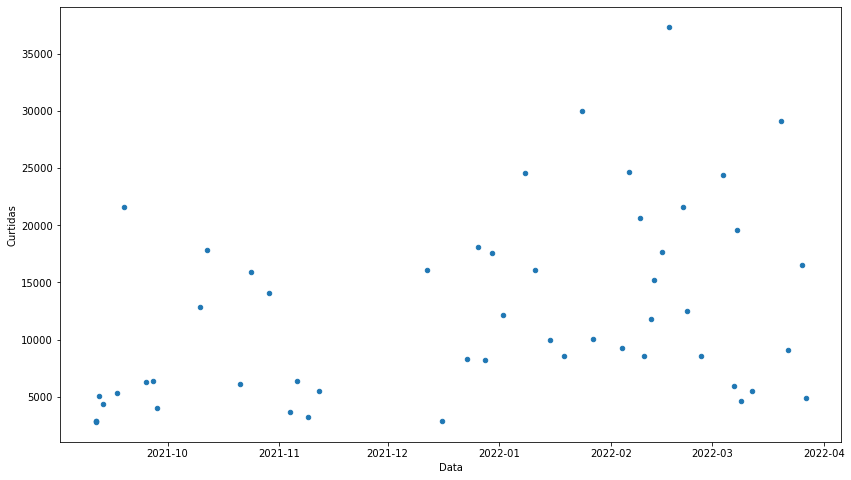

In [ ]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
base.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

### Vamos pegar os 5 primeiros registros com mais e menos curtidas

In [ ]:
# Ordenando os valores
base.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [ ]:
# Selecionando os 5 últimos valores 
base.sort_values(by="Curtidas",ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vamos usar o <font color="blue">group by</font> para entender melhor os dados

In [16]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Agrupando as informações por tipo
base.groupby("Pessoas")["Comentários"].count()

Pessoas
N    12
S    40
Name: Comentários, dtype: int64

- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

**Inclusive é possível agregar por mais de 1 coluna:** <br>

In [ ]:
# Agrupando por Tipo e Pessoas
base.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [ ]:
base.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [ ]:
# Incluindo a coluna de campanhas
base.groupby(["Tipo","Pessoas","Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [ ]:
# Somente para pessoas
base.groupby("Pessoas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [ ]:
# Somente para campanhas
base.groupby("Campanhas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [ ]:
# Carrossel sem filtrar a base -> ESTÁ ERRADO ESSA COMPARAÇÃO
base.groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [ ]:
# Podemos também filtrar a base
base[base.Tipo == "Foto"].groupby(["Carrossel"])[["Curtidas","Comentários"]].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [ ]:
# Agregando por pessoas e campanhas
base.groupby(["Pessoas","Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [ ]:
# Agregando por pessoas, campanhas e tipo
base.groupby(["Pessoas","Campanhas","Tipo"])[["Curtidas","Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [ ]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
base[base.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**